In [1]:
import xlwings as xw
import pandas as pd
import math

In [2]:
# Formula to Run the Macros for the Distribution Data

def run_excel_macros_with_inputs_d(file_path, macro_name, sheet_name, data_range, input_values, station_size, liquid_data_range, gas_data_range):
    # Open the Excel application and file
    app = xw.App(visible=False)  # Run Excel in the background
    wb = app.books.open(file_path)

    # Update inputs on the 'Inputs' sheet
    assumptions_sheet = wb.sheets['Assumptions']
    for cell, value in input_values.items():
        assumptions_sheet.range(cell).value = value

    inputs_sheet = wb.sheets['Inputs']
    for cell, value in station_size.items():
        inputs_sheet.range(cell).value = value

    # Run macro
    wb.app.macro(macro_name)()

    # Load data into Python from the specified sheet and range
    sheet = wb.sheets[sheet_name]
    data = sheet.range(data_range).options(pd.DataFrame, expand='table').value
    liquid_data = sheet.range(liquid_data_range).options(pd.DataFrame, expand='table').value
    gas_data = sheet.range(gas_data_range).options(pd.DataFrame, expand='table').value

    # Close the workbook and quit the application
    wb.close()
    app.quit()

    return (data, liquid_data, gas_data)

In [3]:
# Reading the Data from the Transmission Model

def run_excel_macros_with_inputs(file_path, macro_names, sheet_data_ranges, input_values):
    # Open the Excel application and file
    app = xw.App(visible=False)  # Run Excel in the background
    wb = app.books.open(file_path)

    # Update inputs on the 'Assumptions' sheet
    assumptions_sheet = wb.sheets['Assumptions']
    for cell, value in input_values.items():
        assumptions_sheet.range(cell).value = value

    # Run each macro in the list of macro names
    for macro_name in macro_names:
        wb.app.macro(macro_name)()

    # Load data into Python from the specified sheets and ranges
    data_dict = {}
    for sheet_name, ranges in sheet_data_ranges.items():
        sheet = wb.sheets[sheet_name]
        data_dict[sheet_name] = {}
        for data_type, data_range in ranges.items():
            data_dict[sheet_name][data_type] = sheet.range(data_range).options(pd.DataFrame, expand='table').value

    # Close the workbook and quit the application
    wb.close()
    app.quit()

    return data_dict

In [4]:
def read_data_from_excel(file_path, sheet_name, data_range, liquid_data_range, gas_data_range, pipe_data_range):
    # Open the Excel application and file
    app = xw.App(visible=False)  # Run Excel in the background
    wb = app.books.open(file_path)

    # Load data into Python from the specified sheet and ranges
    sheet = wb.sheets[sheet_name]
    data = sheet.range(data_range).options(pd.DataFrame, expand='table').value
    liquid_data = sheet.range(liquid_data_range).options(pd.DataFrame, expand='table').value
    gas_data = sheet.range(gas_data_range).options(pd.DataFrame, expand='table').value
    pipe_data = sheet.range(pipe_data_range).options(pd.DataFrame, expand='table').value

    # Close the workbook and quit the application
    wb.close()
    app.quit()

    return data, liquid_data, gas_data, pipe_data

In [5]:
# Function for setting the lower limit of the z-limits
def round_down(value, decimals):
    factor = 10 ** decimals
    return math.floor(value * factor) / factor

def round_up(value, decimals):
    factor = 10 ** decimals
    return math.ceil(value * factor) / factor

In [6]:
#Station Sizes

size_500 = {'B1':500}
size_1000 = {'B1':1000}
size_2000 = {'B1':2000}
size_3000 = {'B1':3000}

In [7]:
hydrogen_cost = 9 # in $/kg
hydrogen_efficiency = 7.11 # in mi/kg H2
hydrogen_cab_cost = 350000 # $/truck

diesel_cost = 3.75 # in $/gallon
diesel_efficiency = 9.81 # in km/gallon diesel
diesel_cab_cost = 195000 # $/ truck

gal_diesel = 37.1 #kWh
kg_H2 = 33.3 #kWh
gal_gasoline = 33.7 #kWh
km_to_miles = 0.621371

electricity_CO2 = 369 # from https://ourworldindata.org/grapher/carbon-intensity-electricity
electricity_cost = 0.08

new_hydrogen_truck_efficiency = hydrogen_efficiency


print(diesel_cost, hydrogen_cost, diesel_efficiency, new_hydrogen_truck_efficiency)

3.75 9 9.81 7.11


In [8]:
# pulling out the optimal values for the gas trucks and liquid trucks

gas_data_range = 'B3: Y18'
liquid_data_range = 'B20:Y35'
pipe_data_range = 'B37:Y52'
transmission_macro_names = ['PipeInfo', 'GasInfo', 'LiqInfo']
t_sheet_data_ranges = {
    'Cost-Only Pipe': {'c_pipe_data': 'A1:U51'},
    'GHG Emissions Pipe': {'g_pipe_data': 'A1:U51'},
    'Cost-Only Gas': {'c_gas_data': 'A1:U51'},
    'GHG Emissions Gas': {'g_gas_data': 'A1:U51'},
    'Cost-Only Liquid': {'c_liquid_data': 'A1:U51'},
    'GHG Emissions Liquid': {'g_liquid_data': 'A1:U51'}
}


### Diesel Specifications

In [9]:
# Specify your file path, macro name, data extraction details, and input values
diesel_file_path = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Diesel/DistributionModel_v6.xlsm'
t_diesel_fp = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Diesel/TransmissionModel_v4.xlsm'
# d for distribution
d_macro_name = 'Python_UpdateAll'
d_sheet_name = 'Output'
d_ghg_sheet_name = 'GHG Emissions'
d_data_range = 'B54:Y69'  # Adjust range as needed
d_input_values = { #You can change these based on the assumptions
    'C29': diesel_cab_cost,  #Diesel Cab Cost
    'C31': diesel_efficiency, # Fuel Economy in miles per gal
    'C38': diesel_cost,  # Fuel price of diesel in $/gal
    'C51': electricity_CO2,  # CO2 emissions per g/kWh
    'C46': electricity_cost,
    'C62': electricity_cost
    
    
}

### Hydrogen Specifications

In [10]:
# Specify your file path, macro name, data extraction details, and input values
hydrogen_file_path = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Hydrogen/DistributionModel_Hydrogen.xlsm'
# to get path shift + right click
t_hydrogen_fp = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Hydrogen/TransmissionModel_Hydrogen.xlsm'
# d for diesel
h_macro_name = 'Python_UpdateAll'
h_sheet_name = 'Output'
h_ghg_sheet_name = 'GHG Emissions'
h_data_range = 'B54:Y69'


# Adjust range as needed
h_input_values = { #You can change these based on the assumptions
    'C29': hydrogen_cab_cost,  #Hydrogen Cab Cost
    'C31': new_hydrogen_truck_efficiency, # Fuel Economy in miles per kg of hydrogen
    'C38': hydrogen_cost,  # Fuel price of Hydrogen in $/gal diesel equivalent
    'C51': electricity_CO2,  # CO2 emissions per g/kWh
    'C46': electricity_cost,
    'C62': electricity_cost
}

## Loading Data

In [ ]:
# Distribution Costs

#diesel_500_data = run_excel_macros_with_inputs_d(diesel_file_path, d_macro_name, d_sheet_name, d_data_range, d_input_values, size_500, liquid_data_range, gas_data_range)
diesel_1000_data = run_excel_macros_with_inputs_d(diesel_file_path, d_macro_name, d_sheet_name, d_data_range, d_input_values, size_1000, liquid_data_range, gas_data_range)
diesel_2000_data = run_excel_macros_with_inputs_d(diesel_file_path, d_macro_name, d_sheet_name, d_data_range, d_input_values, size_2000, liquid_data_range, gas_data_range)
diesel_3000_data = run_excel_macros_with_inputs_d(diesel_file_path, d_macro_name, d_sheet_name, d_data_range, d_input_values, size_3000, liquid_data_range, gas_data_range)


In [12]:
#hydrogen_500_data = run_excel_macros_with_inputs_d(hydrogen_file_path, h_macro_name, h_sheet_name, h_data_range, h_input_values, size_500,liquid_data_range, gas_data_range)
hydrogen_1000_data = run_excel_macros_with_inputs_d(hydrogen_file_path, h_macro_name, h_sheet_name, h_data_range, h_input_values, size_1000,liquid_data_range, gas_data_range)
hydrogen_2000_data = run_excel_macros_with_inputs_d(hydrogen_file_path, h_macro_name, h_sheet_name, h_data_range, h_input_values, size_2000,liquid_data_range, gas_data_range)
hydrogen_3000_data = run_excel_macros_with_inputs_d(hydrogen_file_path, h_macro_name, h_sheet_name, h_data_range, h_input_values, size_3000,liquid_data_range, gas_data_range)

In [ ]:
# Distribution GHG Emissions
# Opttimal, Liquid, Gas
#GHG_500_Hydrogen = read_data_from_excel(hydrogen_file_path, '500 GHG', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_1000_Hydrogen = read_data_from_excel(hydrogen_file_path, '1000 GHG', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_2000_Hydrogen = read_data_from_excel(hydrogen_file_path, '2000 GHG', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_3000_Hydrogen = read_data_from_excel(hydrogen_file_path, '3000 GHG', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)

In [ ]:
#GHG_500_Diesel = read_data_from_excel(diesel_file_path, '500 GHG', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_1000_Diesel = read_data_from_excel(diesel_file_path, '1000 GHG', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_2000_Diesel = read_data_from_excel(diesel_file_path, '2000 GHG', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)
GHG_3000_Diesel = read_data_from_excel(diesel_file_path, '3000 GHG', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)

In [11]:
# Transmission
tm_diesel_data = run_excel_macros_with_inputs(t_diesel_fp, transmission_macro_names, t_sheet_data_ranges, d_input_values)

CommandError: Command failed:
		OSERROR: -1708
		MESSAGE: Application could not handle this command.
		COMMAND: app('/Applications/Microsoft Excel.app', newinstance=(0, 9369839)).workbooks['TransmissionModel_v4.xlsm'].worksheets['Assumptions'].cells['C29'].count(each=k.row)

In [78]:
tm_hydrogen_data = run_excel_macros_with_inputs(t_hydrogen_fp, transmission_macro_names, t_sheet_data_ranges, d_input_values)

In [15]:
#low_transmission_100_km = read_data_from_excel(hydrogen_file_path, '1000 T+D Combined - 100 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
#low_transmission_100_miles = read_data_from_excel(hydrogen_file_path, '1000 T+D Combined - 100 miles', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
low_transmission_250_km = read_data_from_excel(hydrogen_file_path, '1000 T+D Combined - 250 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
#medium_transmission_100_km = read_data_from_excel(hydrogen_file_path, '2000 T+D Combined - 100 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
#medium_transmission_100_miles = read_data_from_excel(hydrogen_file_path, '2000 T+D Combined - 100 miles', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
medium_transmission_250_km = read_data_from_excel(hydrogen_file_path, '2000 T+D Combined - 250 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
#high_transmission_100_km = read_data_from_excel(hydrogen_file_path, '3000 T+D Combined - 100 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
#high_transmission_100_miles = read_data_from_excel(hydrogen_file_path, '3000 T+D Combined - 100 miles', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
high_transmission_250_km = read_data_from_excel(hydrogen_file_path, '3000 T+D Combined - 250 km', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)

In [43]:
low_diesel_comparison = read_data_from_excel(diesel_file_path, '1000 (N) (T+D)', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)

#medium_diesel_comparison = read_data_from_excel(diesel_file_path, '2000 (N) (T+D)', d_data_range, liquid_data_range, gas_data_range, pipe_data_range)

In [ ]:
low_transmission_2 = read_data_from_excel(hydrogen_file_path, '1000 T+D Combined (2)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
low_transmission_10 = read_data_from_excel(hydrogen_file_path, '1000 T+D Combined (10)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
medium_transmission_2 = read_data_from_excel(hydrogen_file_path, '2000 T+D Combined (2)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
medium_transmission_10 = read_data_from_excel(hydrogen_file_path, '2000 T+D Combined (10)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
high_transmission_2 = read_data_from_excel(hydrogen_file_path, '3000 T+D Combined (2)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)
high_transmission_10 = read_data_from_excel(hydrogen_file_path, '3000 T+D Combined (10)', h_data_range, liquid_data_range, gas_data_range, pipe_data_range)

In [ ]:
# Example of how to access the data
t_diesel_pipe_costs = tm_diesel_data['Cost-Only Pipe']['c_pipe_data'] #costs for pipe data
t_diesel_liquid_costs = tm_diesel_data['Cost-Only Liquid']['c_liquid_data'] #costs for liquid
t_diesel_gas_costs = tm_diesel_data['Cost-Only Gas']['c_gas_data'] #costs for gas

t_diesel_pipe_ghg = tm_diesel_data['GHG Emissions Pipe']['g_pipe_data'] #GHG Emissions for pipe data
t_diesel_liquid_ghg = tm_diesel_data['GHG Emissions Liquid']['g_liquid_data'] #GHG Emissions  for liquid
t_diesel_gas_ghg = tm_diesel_data['GHG Emissions Gas']['g_gas_data'] #GHG Emissions  for gas


t_diesel_liquid_costs
t_diesel_liquid_ghg

# Distribution Model Graphs

## A. 500 kg/day

### Original 500 kg/day Visualization

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Provided data
data_str = """	2	5	10	20	40	60	80	100	120	140	160	180	200	220	240	260	280	300	350	400	600	800	1000
3	1.633	1.373	1.309	1.243	1.224	1.207	1.213	1.204	1.203	1.198	1.202	1.198	1.198	1.195	1.198	1.195	1.195	1.193	1.193	1.194	1.190	1.176	1.157
5	1.633	1.378	1.314	1.248	1.229	1.232	1.226	1.228	1.224	1.225	1.222	1.224	1.222	1.223	1.221	1.222	1.220	1.221	1.219	1.217	1.216	1.214	1.213
7.5	1.639	1.386	1.320	1.285	1.266	1.269	1.255	1.259	1.256	1.258	1.252	1.254	1.252	1.254	1.250	1.252	1.251	1.252	1.251	1.248	1.247	1.245	1.245
10	1.645	1.391	1.388	1.354	1.319	1.307	1.300	1.296	1.293	1.291	1.289	1.288	1.286	1.285	1.285	1.284	1.283	1.283	1.281	1.280	1.279	1.277	1.276
12.5	1.651	1.398	1.394	1.360	1.340	1.323	1.329	1.320	1.320	1.323	1.318	1.318	1.314	1.317	1.316	1.314	1.316	1.314	1.313	1.311	1.310	1.309	1.308
15	1.657	1.403	1.400	1.396	1.378	1.360	1.359	1.351	1.352	1.347	1.351	1.351	1.348	1.348	1.346	1.346	1.344	1.344	1.344	1.344	1.341	1.340	1.339
17.5	1.663	1.410	1.406	1.402	1.399	1.397	1.388	1.388	1.389	1.380	1.381	1.382	1.379	1.380	1.380	1.376	1.377	1.377	1.377	1.375	1.373	1.372	1.370
20	1.669	1.665	1.537	1.471	1.436	1.424	1.417	1.419	1.415	1.412	1.410	1.415	1.413	1.411	1.410	1.408	1.409	1.408	1.406	1.407	1.404	1.404	1.402
22.5	1.675	1.672	1.543	1.477	1.458	1.461	1.454	1.444	1.447	1.445	1.447	1.442	1.441	1.443	1.442	1.443	1.440	1.439	1.438	1.438	1.436	1.434	1.434
25	1.681	1.677	1.549	1.514	1.495	1.477	1.484	1.481	1.474	1.478	1.477	1.472	1.475	1.474	1.471	1.473	1.472	1.470	1.471	1.470	1.467	1.466	1.466
30	2.000	1.689	1.622	1.588	1.554	1.551	1.542	1.549	1.543	1.539	1.539	1.536	1.540	1.537	1.535	1.535	1.533	1.536	1.535	1.534	1.531	1.529	1.528
35	2.013	1.701	1.635	1.631	1.628	1.615	1.617	1.605	1.607	1.604	1.606	1.600	1.601	1.600	1.601	1.597	1.599	1.598	1.596	1.597	1.594	1.593	1.591
40	2.025	1.836	1.772	1.705	1.686	1.669	1.675	1.672	1.665	1.669	1.664	1.664	1.666	1.663	1.662	1.660	1.662	1.661	1.660	1.660	1.658	1.629	1.605
45	2.037	1.848	1.784	1.748	1.745	1.743	1.734	1.734	1.734	1.726	1.727	1.727	1.728	1.726	1.726	1.727	1.723	1.723	1.722	1.721	1.667	1.633	1.610
50	2.049	1.860	1.857	1.823	1.804	1.807	1.800	1.790	1.793	1.791	1.793	1.791	1.787	1.789	1.787	1.789	1.785	1.773	1.746	1.727	1.672	1.639	1.615
"""

# Remove non-numeric characters
cleaned_data = re.sub(r'[^0-9. \n]', ' ', data_str)

# Convert the data string to a numpy array
data_lines = [line.split() for line in cleaned_data.strip().split('\n')]
data = np.array(data_lines[1:], dtype=float)

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = data[0:, 0]
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = data[0:, 1:]

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),12))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('500 kg/day Capacity',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)


# Show the plot
plt.show()



### Diesel 500 kg/day

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = diesel_500_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = diesel_500_data[0].iloc[:, 0:].values

# GHG_emissions_data = GHG_500_Diesel[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12,10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level (g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('500 kg/day Capacity (Diesel Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed
ax.view_init(elev=20, azim=290)
ax.set_facecolor('white')

# Set grid color and increase visibility
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity


#rect tuple (left, bottom, right, top), default: (0, 0, 1, 1)
#A rectangle in normalized figure coordinates into which the whole subplots area (including labels) will fit.

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/500_kg_diesel.jpg')



# Show the plot
plt.show()

## Hydrogen 500 kg/day

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_500_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_500_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('500 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/500_kg_hydrogen.jpg')

# Show the plot
plt.show()

## B. 1000 kg/day

### Original 1000 kg/day Visualization

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Provided data
data_str = """	2	5	10	20	40	60	80	100	120	140	160	180	200	220	240	260	280	300	350	400	600	800	1000
3	2.113	1.866	1.529	1.292	1.127	1.055	1.013	0.983	0.962	0.946	0.934	0.924	0.916	0.909	0.904	0.899	0.894	0.889	0.877	0.868	0.845	0.834	0.828
5	2.113	1.914	1.863	1.660	1.388	1.269	1.201	1.152	1.116	1.089	1.068	1.051	1.037	1.026	1.016	1.007	1.000	0.994	0.976	0.961	0.923	0.903	0.891
7.5	2.114	1.915	1.864	1.838	1.714	1.537	1.434	1.362	1.308	1.268	1.236	1.210	1.188	1.170	1.155	1.141	1.129	1.119	1.097	1.078	1.019	0.988	0.968
10	2.114	1.915	1.864	1.839	1.778	1.666	1.599	1.552	1.500	1.446	1.403	1.368	1.339	1.314	1.292	1.274	1.257	1.243	1.213	1.190	1.116	1.072	1.044
12.5	2.115	1.916	1.865	1.839	1.779	1.669	1.600	1.554	1.518	1.491	1.465	1.448	1.432	1.419	1.407	1.396	1.385	1.366	1.328	1.297	1.211	1.156	1.120
15	2.116	1.916	1.865	1.840	1.783	1.669	1.602	1.554	1.520	1.492	1.470	1.452	1.433	1.420	1.408	1.397	1.388	1.379	1.361	1.345	1.305	1.239	1.195
17.5	2.116	1.917	1.866	1.840	1.783	1.670	1.603	1.556	1.520	1.493	1.471	1.452	1.437	1.423	1.409	1.398	1.389	1.380	1.362	1.348	1.307	1.283	1.266
20	2.117	1.918	1.867	1.841	1.784	1.673	1.605	1.559	1.524	1.495	1.473	1.454	1.439	1.425	1.413	1.402	1.393	1.384	1.365	1.351	1.310	1.286	1.269
22.5	2.117	1.918	1.867	1.841	1.785	1.673	1.606	1.559	1.524	1.497	1.474	1.456	1.440	1.426	1.414	1.404	1.394	1.385	1.368	1.352	1.312	1.288	1.271
25	2.118	1.949	1.883	1.875	1.802	1.685	1.615	1.566	1.530	1.502	1.479	1.461	1.444	1.430	1.418	1.407	1.397	1.389	1.371	1.355	1.315	1.291	1.274
30	2.119	1.951	1.884	1.876	1.803	1.689	1.618	1.570	1.534	1.505	1.483	1.463	1.450	1.436	1.423	1.412	1.402	1.394	1.376	1.361	1.320	1.296	1.279
35	2.120	1.952	1.885	1.877	1.808	1.690	1.620	1.571	1.536	1.512	1.488	1.469	1.452	1.438	1.426	1.414	1.407	1.397	1.379	1.363	1.323	1.299	1.282
40	2.121	1.953	1.886	1.879	1.809	1.693	1.623	1.580	1.544	1.515	1.491	1.471	1.458	1.443	1.431	1.420	1.412	1.403	1.384	1.369	1.328	1.304	1.287
45	2.123	1.954	1.887	1.887	1.814	1.697	1.633	1.583	1.546	1.522	1.498	1.478	1.461	1.449	1.436	1.425	1.417	1.407	1.388	1.373	1.333	1.309	1.292
50	2.124	1.955	1.888	1.888	1.815	1.709	1.636	1.587	1.554	1.525	1.501	1.483	1.467	1.452	1.441	1.430	1.421	1.412	1.393	1.379	1.338	1.313	1.296
"""

# Remove non-numeric characters
cleaned_data = re.sub(r'[^0-9. \n]', ' ', data_str)

# Convert the data string to a numpy array
data_lines = [line.split() for line in cleaned_data.strip().split('\n')]
data = np.array(data_lines[1:], dtype=float)

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = data[0:, 0]
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = data[0:, 1:]

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),8))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=280)

# Show the plot
plt.show()


### Diesel 1000 kg/day Visualization

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = diesel_1000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = diesel_1000_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_1000_Diesel[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)
# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level (g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),12))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity (Diesel Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity


fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_kg_diesel.jpg')

# Show the plot
plt.show()


## Hydrogen 1000 kg/day

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_1000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_1000_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_1000_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level (g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),7))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_kg_hydrogen.jpg')

# Show the plot
plt.show()


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = low_transmission_2[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = low_transmission_2[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity \n (Transmission 2x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_hydrogen_total_2.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = low_transmission_10[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = low_transmission_10[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity \n (Transmission 10x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_hydrogen_total_10.jpg')

# Show the plot
plt.show()

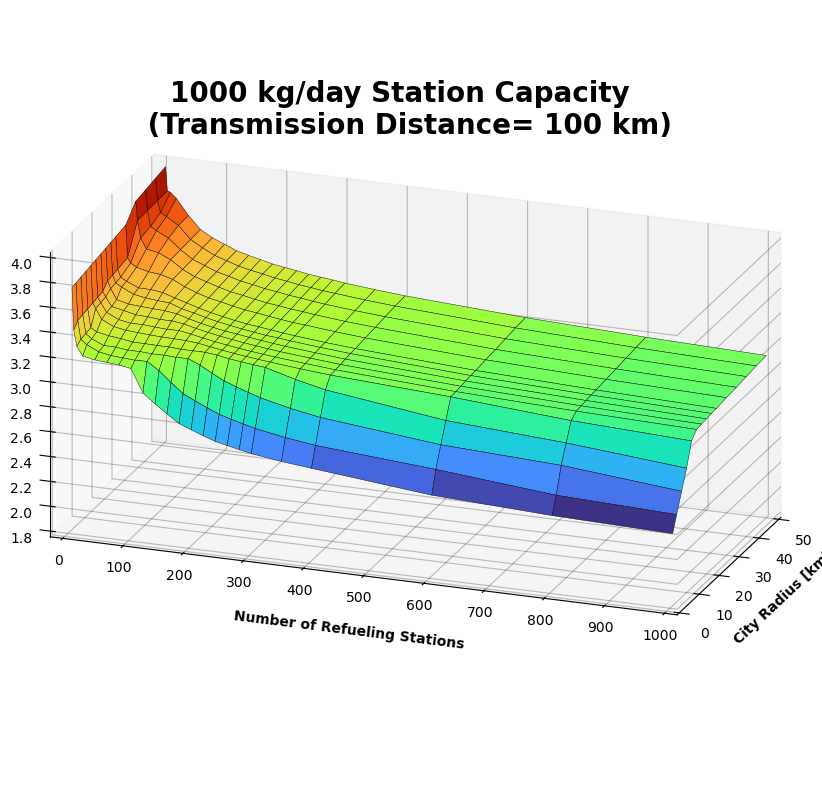

In [14]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = low_transmission_100_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = low_transmission_100_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([1.8, 4.0])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(1.8, 4.0,12))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]',fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('1000 kg/day Station Capacity \n (Transmission Distance= 100 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_hydrogen_total_100_km.jpg')

# Show the plot
plt.show()

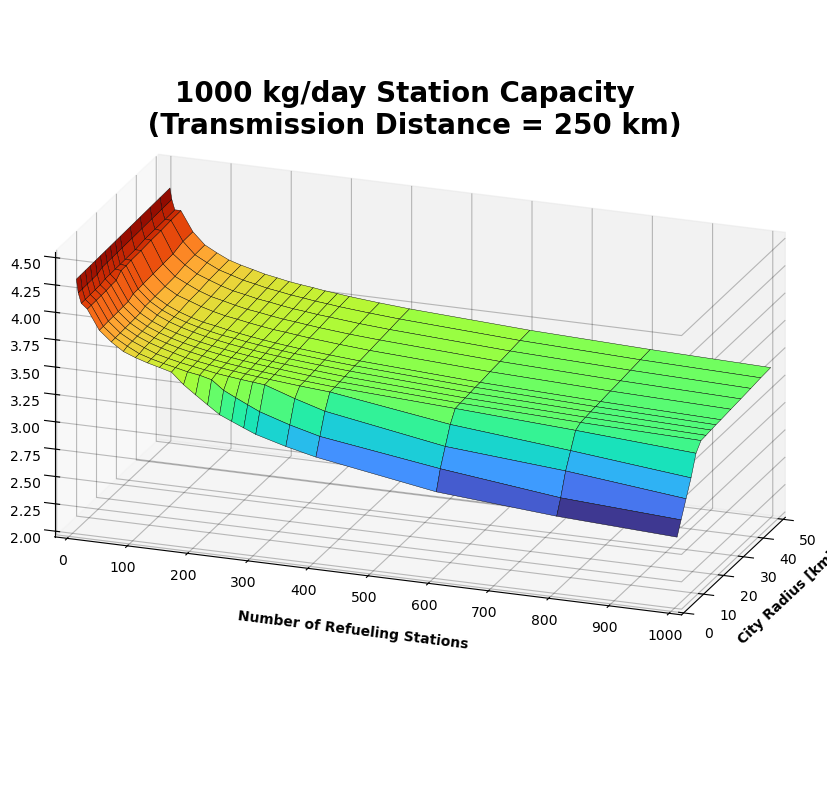

In [18]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = low_transmission_250_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = low_transmission_250_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([2, 4.5])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(2,4.5,11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]', fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('1000 kg/day Station Capacity \n (Transmission Distance = 250 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_hydrogen_total_250_km.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = low_transmission_150_miles[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = low_transmission_150_miles[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity \n (Transmission = 150 miles)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_hydrogen_total_150_miles.jpg')

# Show the plot
plt.show()

## C. 2000 kg/day

### Original 2000 kg/day Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Provided data
data_str = """	2	5	10	20	40	60	80	100	120	140	160	180	200	220	240	260	280	300	350	400	600	800	1000
3	1.630	1.270	1.078	0.945	0.853	0.811	0.788	0.773	0.763	0.756	0.748	0.741	0.735	0.730	0.726	0.722	0.719	0.716	0.711	0.707	0.699	0.691	0.687
5	1.846	1.681	1.369	1.151	1.000	0.933	0.894	0.869	0.852	0.839	0.830	0.818	0.809	0.800	0.793	0.787	0.782	0.777	0.768	0.761	0.746	0.736	0.728
7.5	1.846	1.753	1.716	1.409	1.184	1.084	1.026	0.988	0.962	0.942	0.927	0.914	0.900	0.888	0.878	0.869	0.861	0.854	0.839	0.828	0.803	0.791	0.779
10	1.847	1.753	1.717	1.666	1.368	1.236	1.158	1.107	1.071	1.044	1.022	1.005	0.991	0.976	0.962	0.950	0.939	0.929	0.910	0.895	0.859	0.841	0.829
12.5	1.848	1.754	1.726	1.697	1.507	1.388	1.290	1.226	1.180	1.145	1.117	1.095	1.077	1.062	1.046	1.031	1.017	1.005	0.981	0.961	0.914	0.889	0.875
15	1.848	1.754	1.726	1.697	1.508	1.418	1.367	1.332	1.288	1.246	1.212	1.185	1.162	1.144	1.127	1.111	1.095	1.081	1.051	1.027	0.969	0.938	0.919
17.5	1.849	1.755	1.727	1.698	1.511	1.419	1.368	1.332	1.304	1.284	1.266	1.251	1.239	1.225	1.206	1.189	1.173	1.156	1.121	1.093	1.024	0.986	0.962
20	1.849	1.756	1.727	1.698	1.511	1.425	1.370	1.334	1.308	1.287	1.269	1.255	1.243	1.232	1.222	1.214	1.207	1.200	1.186	1.159	1.078	1.034	1.006
22.5	1.850	1.756	1.728	1.703	1.514	1.427	1.375	1.336	1.309	1.288	1.271	1.256	1.244	1.233	1.225	1.217	1.208	1.202	1.188	1.176	1.133	1.082	1.049
25	1.850	1.757	1.728	1.704	1.514	1.429	1.376	1.341	1.313	1.290	1.273	1.259	1.247	1.237	1.228	1.219	1.211	1.205	1.191	1.180	1.148	1.129	1.093
30	1.852	1.758	1.729	1.705	1.517	1.432	1.379	1.343	1.316	1.295	1.278	1.264	1.252	1.241	1.232	1.224	1.216	1.209	1.195	1.184	1.153	1.134	1.121
35	1.853	1.776	1.767	1.724	1.527	1.439	1.386	1.349	1.321	1.299	1.282	1.268	1.255	1.244	1.235	1.227	1.219	1.214	1.199	1.188	1.157	1.138	1.125
40	1.854	1.777	1.768	1.725	1.531	1.442	1.389	1.351	1.327	1.305	1.287	1.272	1.260	1.250	1.241	1.232	1.224	1.218	1.204	1.192	1.161	1.142	1.129
45	1.855	1.778	1.770	1.731	1.534	1.445	1.396	1.358	1.330	1.310	1.292	1.277	1.265	1.255	1.245	1.237	1.229	1.223	1.209	1.197	1.166	1.147	1.134
50	1.856	1.779	1.771	1.732	1.537	1.453	1.399	1.363	1.335	1.315	1.297	1.283	1.270	1.259	1.250	1.242	1.235	1.227	1.213	1.202	1.171	1.152	1.139
"""

# Remove non-numeric characters
cleaned_data = re.sub(r'[^0-9. \n]', ' ', data_str)

# Convert the data string to a numpy array
data_lines = [line.split() for line in cleaned_data.strip().split('\n')]
data = np.array(data_lines[1:], dtype=float)

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = data[0:, 0]
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = data[0:, 1:]

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),8))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Show the plot
plt.show()

### Diesel 2000 kg/day Visualization

In [ ]:
# Provided data
import pandas as pd
from io import StringIO

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = diesel_2000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = diesel_2000_data[0].iloc[:, 0:].values

# GHG_emissions_data = GHG_2000_Diesel[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level (g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity (Diesel Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity


# Continue with the rest of your plotting code
# Show the plot
plt.show()



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_kg_diesel.jpg')

# Show the plot
plt.show()


## Hydrogen 2000 kg/day

In [ ]:
# Provided data
import pandas as pd
from io import StringIO

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_2000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_2000_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_2000_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level (g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase 
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_kg_hydrogen.jpg')
    
# Show the plot
plt.show()


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = medium_transmission_2[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = medium_transmission_2[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity \n (Transmission 2x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_hydrogen_total_2.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = medium_transmission_10[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = medium_transmission_10[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity \n (Transmission 10x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_hydrogen_total_10.jpg')

# Show the plot
plt.show()

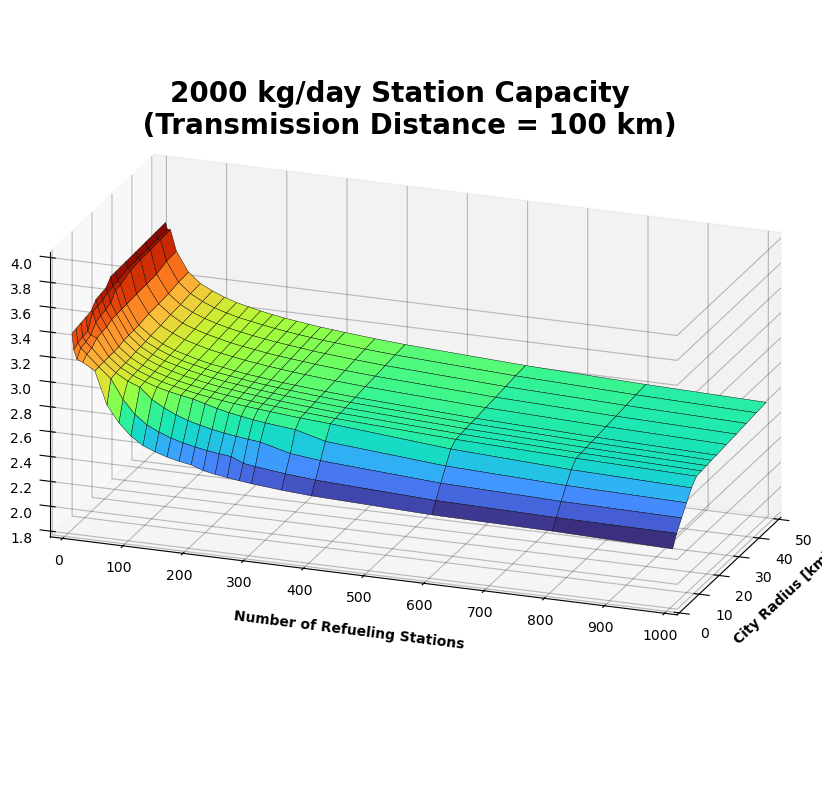

In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = medium_transmission_100_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = medium_transmission_100_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([1.8, 4.0])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(1.8, 4.0,12))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]', fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('2000 kg/day Station Capacity \n (Transmission Distance = 100 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_hydrogen_total_100_km.jpg')

# Show the plot
plt.show()

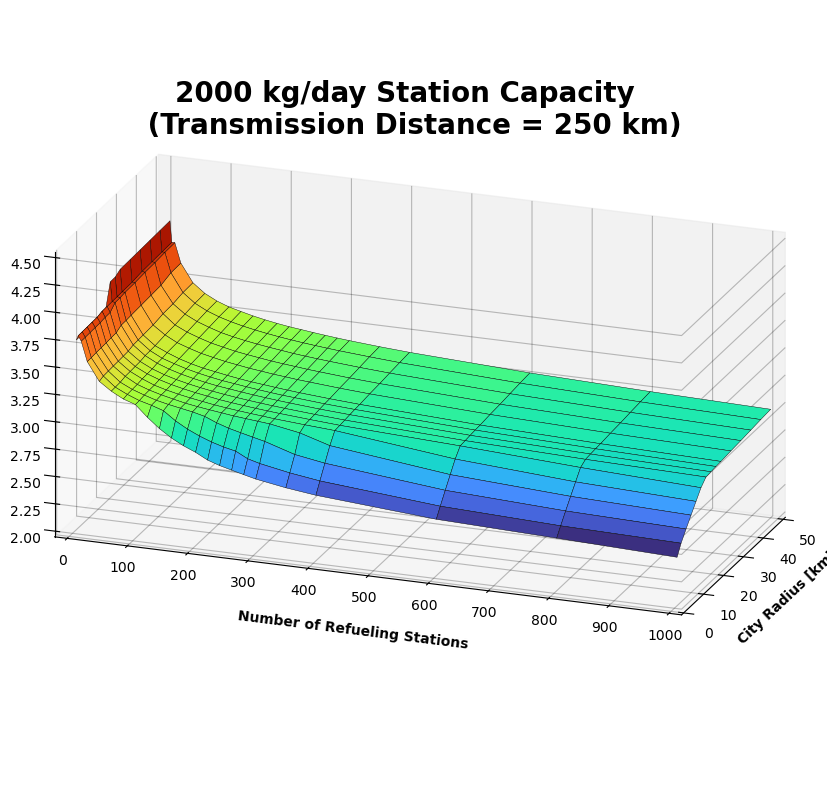

In [19]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = medium_transmission_250_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = medium_transmission_250_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([2, 4.5])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(2,4.5,11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]', fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('2000 kg/day Station Capacity \n (Transmission Distance = 250 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_hydrogen_total_250_km.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = medium_transmission_150_miles[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = medium_transmission_150_miles[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity \n (Transmission = 150 miles)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_hydrogen_total_150_miles.jpg')

# Show the plot
plt.show()

## D. 3000 kg/day

### Original 3000 kg/day Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Provided data
data_str = """	2	5	10	20	40	60	80	100	120	140	160	180	200	220	240	260	280	300	350	400	600	800	1000
3	1.170	0.955	0.837	0.755	0.697	0.674	0.663	0.652	0.644	0.637	0.632	0.629	0.626	0.623	0.621	0.620	0.618	0.617	0.615	0.612	0.605	0.603	0.604
5	1.563	1.203	1.012	0.880	0.788	0.749	0.729	0.714	0.701	0.691	0.683	0.676	0.671	0.667	0.664	0.661	0.659	0.657	0.653	0.649	0.638	0.633	0.632
7.5	1.703	1.513	1.232	1.036	0.900	0.843	0.812	0.792	0.772	0.757	0.745	0.736	0.728	0.722	0.716	0.712	0.708	0.705	0.699	0.694	0.677	0.669	0.665
10	1.703	1.657	1.451	1.193	1.012	0.936	0.893	0.866	0.844	0.824	0.808	0.795	0.785	0.776	0.769	0.762	0.757	0.752	0.743	0.736	0.717	0.704	0.698
12.5	1.729	1.658	1.658	1.349	1.125	1.028	0.975	0.940	0.915	0.890	0.870	0.854	0.841	0.830	0.821	0.813	0.806	0.800	0.787	0.778	0.756	0.739	0.729
15	1.730	1.658	1.658	1.479	1.237	1.121	1.056	1.013	0.983	0.956	0.932	0.913	0.897	0.884	0.872	0.862	0.854	0.846	0.831	0.820	0.793	0.773	0.761
17.5	1.730	1.659	1.659	1.480	1.330	1.213	1.136	1.086	1.050	1.023	0.995	0.972	0.953	0.937	0.924	0.912	0.902	0.893	0.875	0.861	0.828	0.807	0.792
20	1.731	1.659	1.659	1.483	1.334	1.264	1.217	1.159	1.117	1.086	1.057	1.031	1.009	0.991	0.975	0.962	0.950	0.940	0.918	0.902	0.862	0.841	0.822
22.5	1.732	1.660	1.660	1.483	1.334	1.266	1.224	1.195	1.174	1.148	1.119	1.090	1.065	1.045	1.027	1.012	0.998	0.986	0.962	0.943	0.896	0.873	0.853
25	1.732	1.671	1.666	1.495	1.340	1.271	1.228	1.199	1.177	1.160	1.146	1.135	1.121	1.098	1.078	1.061	1.046	1.032	1.005	0.983	0.931	0.904	0.884
30	1.733	1.672	1.667	1.499	1.344	1.273	1.233	1.204	1.182	1.165	1.151	1.139	1.130	1.122	1.114	1.107	1.102	1.096	1.085	1.065	0.999	0.965	0.944
35	1.734	1.673	1.668	1.500	1.346	1.279	1.236	1.207	1.185	1.169	1.155	1.144	1.133	1.125	1.118	1.111	1.105	1.100	1.089	1.079	1.055	1.025	1.000
40	1.735	1.674	1.674	1.503	1.354	1.281	1.241	1.213	1.190	1.173	1.160	1.148	1.138	1.130	1.122	1.116	1.110	1.104	1.093	1.084	1.059	1.044	1.034
45	1.737	1.675	1.675	1.507	1.356	1.288	1.246	1.217	1.195	1.179	1.164	1.153	1.143	1.135	1.127	1.121	1.115	1.110	1.098	1.089	1.064	1.049	1.039
50	1.738	1.721	1.698	1.519	1.364	1.293	1.251	1.222	1.200	1.183	1.169	1.157	1.148	1.139	1.132	1.126	1.120	1.114	1.103	1.094	1.069	1.054	1.044
"""

# Remove non-numeric characters
cleaned_data = re.sub(r'[^0-9. \n]', ' ', data_str)

# Convert the data string to a numpy array
data_lines = [line.split() for line in cleaned_data.strip().split('\n')]
data = np.array(data_lines[1:], dtype=float)

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = data[0:, 0]
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = data[0:, 1:]

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),7))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)
    
# Show the plot
plt.show()

### Diesel 3000 kg/day Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = diesel_3000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = diesel_3000_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_3000_Diesel[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity (Diesel Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_kg_diesel.jpg')
    
# Show the plot
plt.show()


## Hydrogen 3000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_3000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_3000_data[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_3000_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity


fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_kg_hydrogen.jpg')
    
# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = high_transmission_2[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = high_transmission_2[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity \n (Transmission 2x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_hydrogen_total_2.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = high_transmission_10[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = high_transmission_10[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity \n (Transmission 10x City Radius)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_hydrogen_total_10.jpg')

# Show the plot
plt.show()

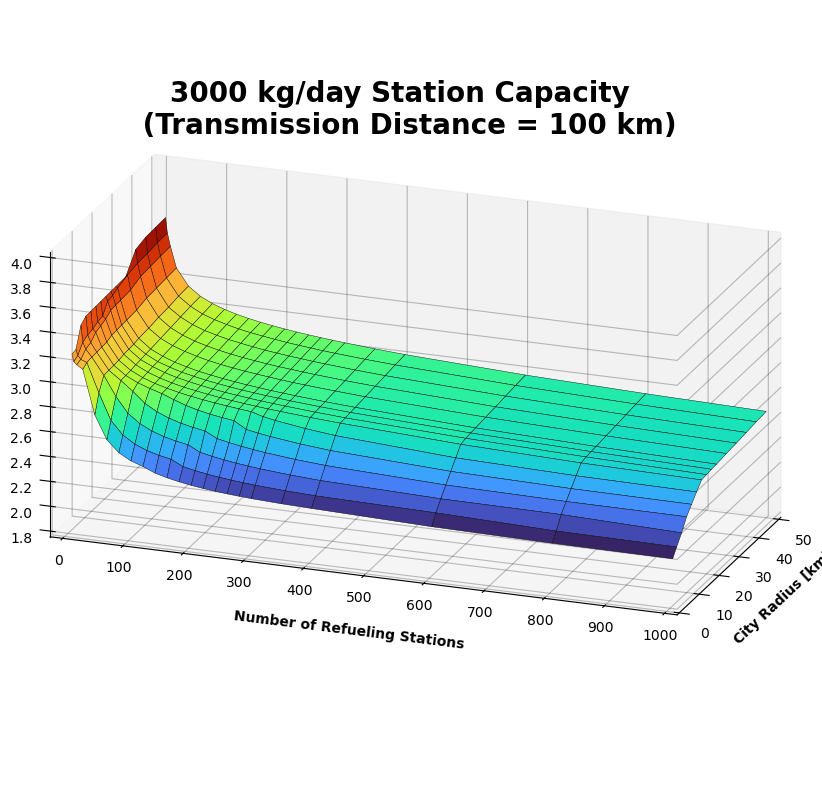

In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = high_transmission_100_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = high_transmission_100_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([1.8, 4.0])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(1.8, 4.0,12))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]', fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('3000 kg/day Station Capacity \n (Transmission Distance = 100 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_hydrogen_total_100_km.jpg')

# Show the plot
plt.show()

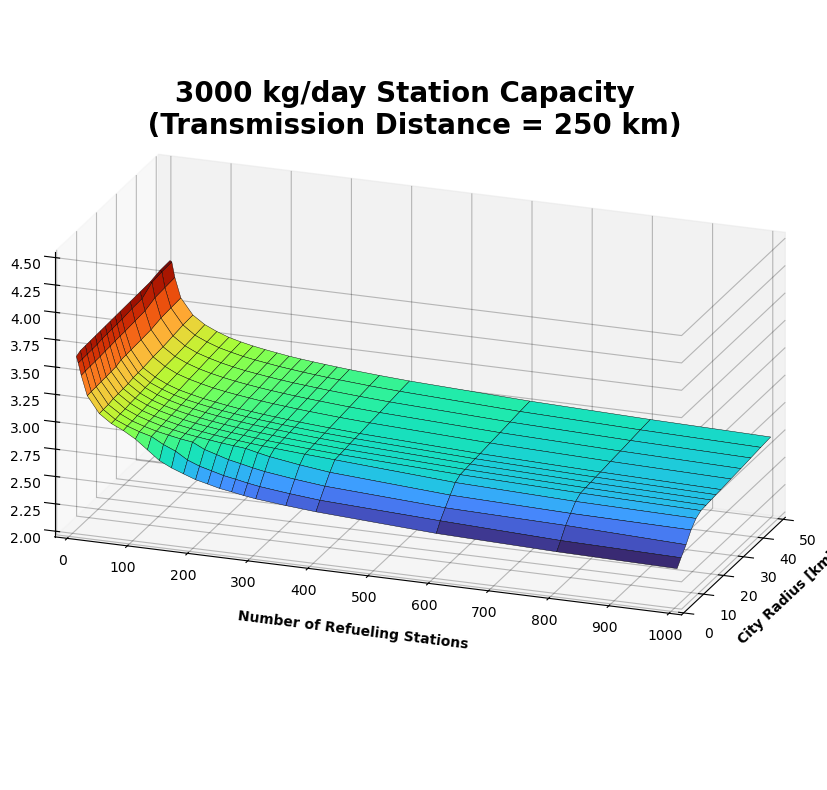

In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = high_transmission_250_km[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = high_transmission_250_km[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([2, 4.5])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(2,4.5,11))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations', fontweight = 'bold')
ax.set_ylabel('City Radius [km]', fontweight = 'bold')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]', fontweight = 'bold')
ax.set_title('3000 kg/day Station Capacity \n (Transmission Distance = 250 km)',  x=0.5, y=0.9,fontsize = 20, fontweight = 'bold')

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_hydrogen_total_250_km.jpg')

# Show the plot
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = high_transmission_150_miles[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = high_transmission_150_miles[0].iloc[:, 0:].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Total Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity \n (Transmission = 150 miles)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_hydrogen_total_150_miles.jpg')

# Show the plot
plt.show()

# Cost Differences

## Distribution Cost Differences

The cost difference between hydrogen and diesel trucks based on 2030 estimates of where the hydrogen and diesel truck capabilities are (Referenced a UC Davis study for these numbers). A positive value indicates that a hydrogen truck is more expensive while a negative value indicates that a diesel truck is more expensive. The dark blue at the bottom means there is not cost difference between the most optimal delivery methods.

## Liquid Trucks Optimal Values

### 500 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_500_data[1].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_500_data[1].iloc[:, 0:].values - diesel_500_data[1].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('500 kg/day Capacity (Liquid Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/500_kg_Dist_Liquid_Cost_Difference.jpg')
    
# Show the plot
plt.show()

### 1000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_1000_data[1].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_1000_data[1].iloc[:, 0:].values - diesel_1000_data[1].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity (Liquid Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_kg_Dist_Liquid_Cost_Difference.jpg')
    
# Show the plot
plt.show()

### 2000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_2000_data[1].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_2000_data[1].iloc[:, 0:].values - diesel_2000_data[1].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity (Liquid Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_kg_Dist_Liquid_Cost_Difference.jpg')
    
# Show the plot
plt.show()

### 3000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_3000_data[1].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_3000_data[1].iloc[:, 0:].values - diesel_3000_data[1].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity (Liquid Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_kg_Dist_Liquid_Cost_Difference.jpg')
    
# Show the plot
plt.show()

# Gas Trucks Optimal Costs

## 500 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_500_data[2].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_500_data[2].iloc[:, 0:].values - diesel_500_data[2].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('500 kg/day Capacity (Gas Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/500_kg_Dist_Gas_Cost_Difference.jpg')
    
# Show the plot
plt.show()

## 1000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_1000_data[2].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_1000_data[2].iloc[:, 0:].values - diesel_1000_data[2].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('1000 kg/day Capacity (Gas Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/1000_kg_Dist_Gas_Cost_Difference.jpg')
    
# Show the plot
plt.show()

## 2000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_2000_data[2].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_2000_data[2].iloc[:, 0:].values - diesel_2000_data[2].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('2000 kg/day Capacity (Gas Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/2000_kg_Dist_Gas_Cost_Difference.jpg')
    
# Show the plot
plt.show()

## 3000 kg/day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_3000_data[2].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = hydrogen_3000_data[2].iloc[:, 0:].values - diesel_3000_data[2].iloc[:, 0:].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Reds', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),3), round_up(np.max(Z),3)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),3), round_up(np.max(Z),3),9))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('Hydrogen Delivered Cost [$ per kg]')
ax.set_title('3000 kg/day Capacity (Gas Cost Difference)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)


fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/3000_kg_Dist_Gas_Cost_Difference.jpg')
    
# Show the plot
plt.show()

## Sensitivity Analysis

In [45]:
# Comparing number of stations 2, 60, 180, 1000
# x-axis is the city size

x = [3, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 30, 35, 40, 45, 50]

### Liquid

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

NameError: name 'plt' is not defined

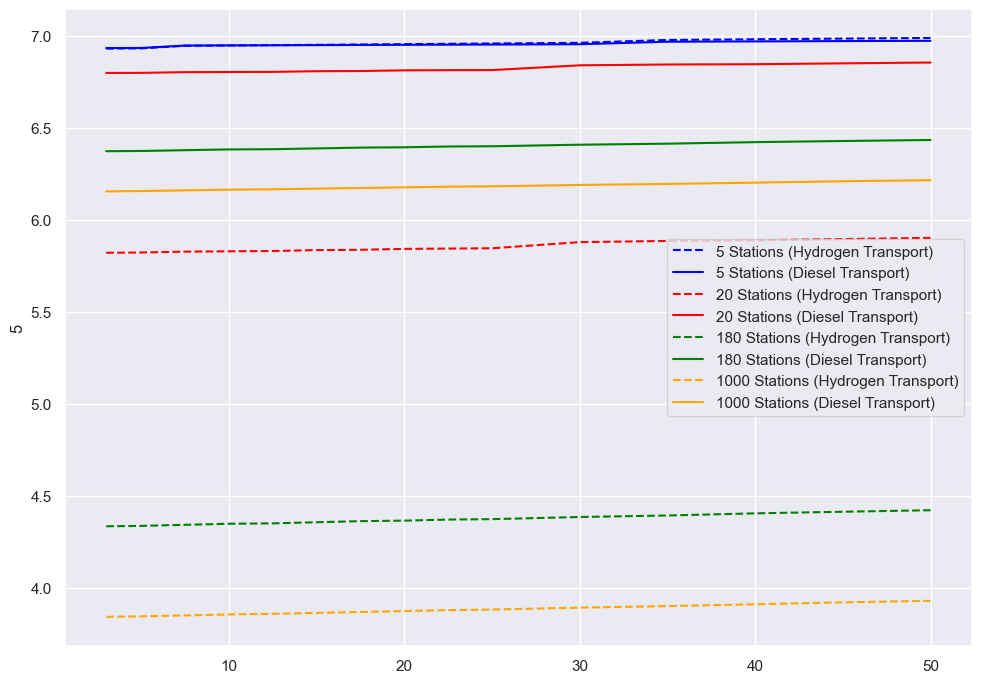

In [16]:

import seaborn as sns


# 2 stations
sns.lineplot(x = x, y = 5, data = medium_transmission_100_km[1], 
             label ='5 Stations (Hydrogen Transport)', color='blue',     
             linestyle='--')
sns.lineplot(x = x, y = 5, data = medium_diesel_comparison[1], 
             label ='5 Stations (Diesel Transport)',color='blue')

# 60 stations
sns.lineplot(x = x, y = 20, data = medium_transmission_100_km[1], 
             label ='20 Stations (Hydrogen Transport)',color='red',     
             linestyle='--')
sns.lineplot(x = x, y = 20, data = medium_diesel_comparison[1], 
             label ='20 Stations (Diesel Transport)', color = 'red')

# 180 stations
sns.lineplot(x = x, y = 180, data = medium_transmission_100_km[1], 
             label ='180 Stations (Hydrogen Transport)', color='green',     
             linestyle='--')
sns.lineplot(x = x, y = 180, data = medium_diesel_comparison[1], 
             label ='180 Stations (Diesel Transport)', color = 'green')
# 1000 stations
sns.lineplot(x = x, y = 1000, data = medium_transmission_100_km[1], 
             label ='1000 Stations (Hydrogen Transport)', color='orange',     
             linestyle='--')
sns.lineplot(x = x, y = 1000, data = medium_diesel_comparison[1], 
             label ='1000 Stations (Diesel Transport)', color = 'orange')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
# Adding titles and labels
plt.title('Cost Difference via Transport by Liquid Trucks \n for 2000 kg/day stations', fontsize = 30, fontweight ='bold')
plt.xlabel('City Radius (km)',fontsize = 20, fontweight =580)
plt.ylabel('Levelized Cost of Hydrogen ($/kg)',fontsize = 20, fontweight =580)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim([3,50])

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/Cost_Dif_Liquid')
    

In [18]:
medium_diesel_comparison[1]

,2.0,5.0,10.0,20.0,40.0,60.0,80.0,100.0,120.0,140.0,...,220.0,240.0,260.0,280.0,300.0,350.0,400.0,600.0,800.0,1000.0
3.0,7.083799,6.933473,6.933473,6.798128,6.637458,6.561290,6.505974,6.465653,6.437244,6.411277,...,6.343647,6.330555,6.318751,6.309307,6.299402,6.278882,6.261615,6.211933,6.178607,6.154471
5.0,7.084369,6.934021,6.934021,6.798656,6.637961,6.562792,6.507216,6.470940,6.438728,6.412179,...,6.344933,6.331770,6.321290,6.310411,6.301861,6.281226,6.263719,6.213781,6.180699,6.156349
7.5,7.085256,6.946994,6.940928,6.802490,6.640230,6.564533,6.508688,6.472856,6.440432,6.417167,...,6.348612,6.335193,6.324964,6.313867,6.305128,6.284286,6.266624,6.217021,6.184104,6.159913
10.0,7.086144,6.947840,6.941772,6.803292,6.653015,6.566276,6.516176,6.474773,6.445642,6.422158,...,6.352569,6.338872,6.328408,6.318827,6.308397,6.288550,6.270733,6.220964,6.188113,6.163839
12.5,7.086799,6.948474,6.942406,6.803905,6.653606,6.567864,6.517504,6.480150,6.447213,6.423147,...,6.353666,6.341927,6.331268,6.319801,6.310944,6.289606,6.272925,6.222797,6.189767,6.165804
15.0,7.087687,6.949321,6.943250,6.807743,6.655881,6.576621,6.519739,6.482069,6.452427,6.425137,...,6.357350,6.345609,6.334714,6.323262,6.314216,6.294046,6.276886,6.226744,6.193703,6.169373
17.5,7.088575,6.950168,6.944095,6.808548,6.658158,6.579380,6.526477,6.483991,6.454642,6.430134,...,6.361312,6.349293,6.338163,6.328228,6.317692,6.297113,6.279798,6.230092,6.197116,6.172884
20.0,7.089464,6.951015,6.951015,6.812389,6.660436,6.581128,6.528716,6.490123,6.459862,6.435134,...,6.365001,6.352726,6.341848,6.331694,6.322371,6.301385,6.283764,6.234043,6.200607,6.176457
22.5,7.090353,6.951862,6.951862,6.813195,6.661196,6.582877,6.530196,6.492047,6.461574,6.437128,...,6.368968,6.356415,6.345301,6.334945,6.325649,6.304456,6.287732,6.237295,6.204550,6.179972
25.0,7.091009,6.952498,6.952498,6.813810,6.663308,6.584470,6.531528,6.493222,6.463149,6.438121,...,6.370068,6.357721,6.346547,6.336139,6.326798,6.306893,6.288876,6.239133,6.206208,6.181942


In [19]:
medium_transmission_100_km[1]

,2.0,5.0,10.0,20.0,40.0,60.0,80.0,100.0,120.0,140.0,...,220.0,240.0,260.0,280.0,300.0,350.0,400.0,600.0,800.0,1000.0
3.0,7.308690,6.930429,6.607619,5.820945,4.953680,4.762226,4.640244,4.547023,4.480243,4.422040,...,4.267229,4.238920,4.213803,4.191537,4.168452,4.122411,4.083457,3.971509,3.896660,3.842066
5.0,7.310051,6.931762,6.608952,5.822257,4.954968,4.764512,4.642270,4.554236,4.482511,4.423726,...,4.269299,4.240919,4.217565,4.193424,4.172076,4.125864,4.086631,3.974331,3.899821,3.844956
7.5,7.311933,6.945721,6.616844,5.827074,4.958220,4.767236,4.644724,4.557134,4.485198,4.430513,...,4.274479,4.245801,4.222661,4.198271,4.176706,4.130233,4.090803,3.978934,3.904637,3.849959
10.0,7.313816,6.947552,6.618674,5.828860,4.974843,4.769962,4.654623,4.560034,4.492342,4.437303,...,4.279939,4.250938,4.227527,4.205030,4.181338,4.136133,4.096467,3.984431,3.910200,3.855439
12.5,7.315458,6.949169,6.620289,5.830454,4.976415,4.772532,4.656933,4.567535,4.494894,4.439273,...,4.282016,4.255450,4.231807,4.206984,4.185248,4.138169,4.099925,3.987436,3.912977,3.858614
15.0,7.317343,6.951002,6.622121,5.835277,4.979675,4.784178,4.660152,4.570439,4.502045,4.442247,...,4.287204,4.260593,4.236678,4.211838,4.189885,4.144247,4.105442,3.992939,3.918469,3.863625
17.5,7.319229,6.952836,6.623953,5.837067,4.982938,4.787922,4.669304,4.573345,4.505246,4.449046,...,4.292671,4.265738,4.241552,4.218606,4.194727,4.148626,4.109625,3.997653,3.923296,3.868578
20.0,7.321116,6.954671,6.631860,5.841895,4.986202,4.790656,4.672529,4.581607,4.512404,4.455848,...,4.297866,4.270634,4.246662,4.223466,4.201154,4.154537,4.115149,4.003162,3.928201,3.873594
22.5,7.323004,6.956507,6.633696,5.843688,4.987949,4.793392,4.674996,4.584518,4.515103,4.458830,...,4.303339,4.275786,4.251541,4.228112,4.205800,4.158922,4.120675,4.007781,3.933703,3.878553
25.0,7.324650,6.958126,6.635316,5.845286,4.991044,4.795969,4.677311,4.586676,4.517662,4.460806,...,4.305423,4.278075,4.253771,4.230289,4.207932,4.162668,4.122802,4.010793,3.936487,3.881735


### Gas & Liquid Trucks Cost Differrence

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

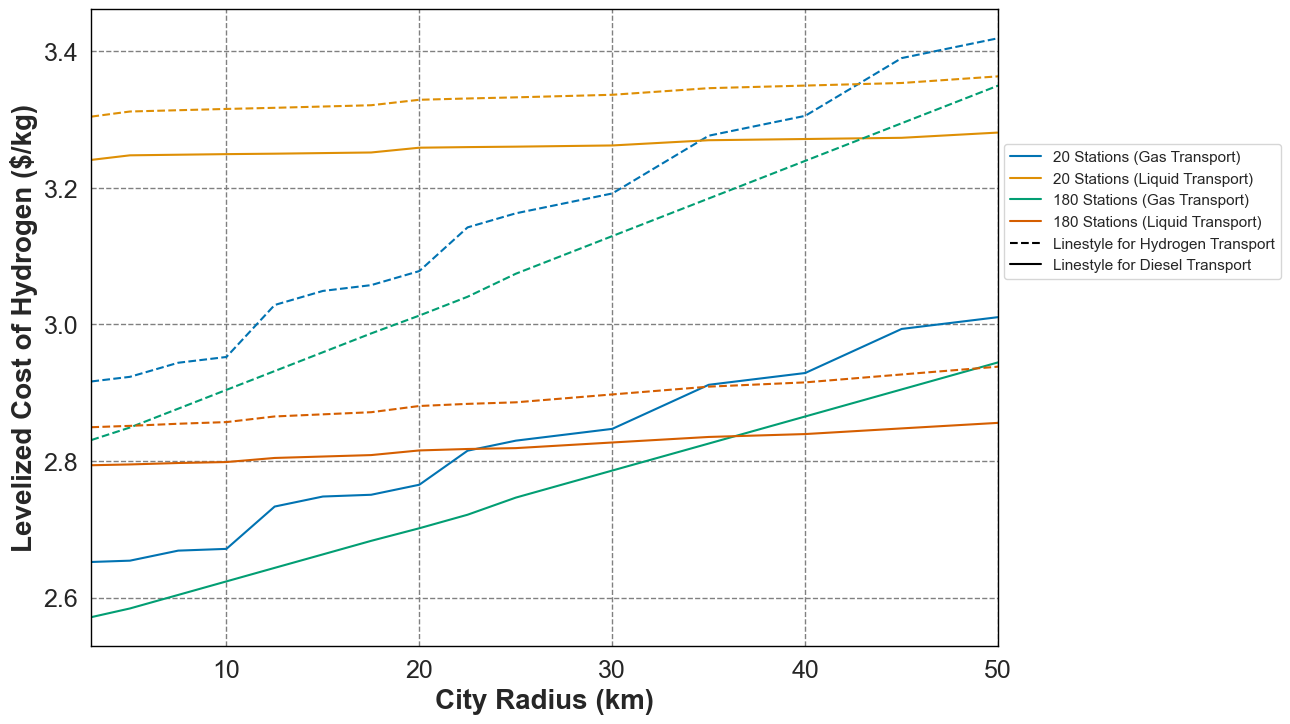

<Figure size 1170x827 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Color Universal Design color palette (colorblind friendly)
color_palette = sns.color_palette("colorblind")

# 2 stations
sns.lineplot(x = x, y = 20, data = low_transmission_100_km[2], 
             label='20 Stations (Gas Hydrogen Transport)', color=color_palette[0],     
             linestyle='--', legend = False)
sns.lineplot(x = x, y = 20, data = low_diesel_comparison[2], 
             label='20 Stations (Gas Diesel Transport)', color=color_palette[0], legend = False)

# 2 stations
sns.lineplot(x = x, y = 20, data = low_transmission_100_km[1], 
             label='20 Stations (Liquid Hydrogen Transport)', color=color_palette[1],     
             linestyle='--', legend = False)
sns.lineplot(x = x, y = 20, data = low_diesel_comparison[1], 
             label='20 Stations (Liquid Diesel Transport)', color=color_palette[1], legend = False)

# 300 stations
sns.lineplot(x = x, y = 180, data = low_transmission_100_km[2], 
             label='180 Stations (Gas Hydrogen Transport)', color=color_palette[2],     
             linestyle='--', legend = False)
sns.lineplot(x = x, y = 180, data = low_diesel_comparison[2], 
             label='180 Stations (Gas Diesel Transport)', color=color_palette[2], legend = False)

# 300 stations
sns.lineplot(x = x, y = 180, data = low_transmission_100_km[1], 
             label='180 Stations (Liquid Hydrogen Transport)', color=color_palette[3],     
             linestyle='--', legend = False)
sns.lineplot(x = x, y = 180, data = low_diesel_comparison[1], 
             label='180 Stations (Liquid Diesel Transport)', color=color_palette[3], legend = False)


sns.set_theme(rc={'figure.figsize':(11.7,8.27), 'axes.facecolor': 'white', 
                  'grid.color': 'gray', 
                  'grid.linestyle': '--', 
                  'grid.alpha': 1})

# Adding titles and labels
#plt.title('Cost Difference via \n Diesel and Hydrogen Truck Transport for 1000 kg/day stations', fontsize=30, fontweight='bold')
plt.xlabel('City Radius (km)', fontsize=20, fontweight=580)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Levelized Cost of Hydrogen ($/kg)', fontsize=20, fontweight=580)
plt.xlim([3, 50])

# Restore the plot's border (outline)
plt.gca().spines['top'].set_visible(True)  # Restore top border
plt.gca().spines['right'].set_visible(True)  # Restore right border
plt.gca().spines['left'].set_visible(True)  # Restore left border
plt.gca().spines['bottom'].set_visible(True)  # Restore bottom border

# Optional: Customize border color and thickness
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# Create custom handles for the color-based legend (station count)
station_legend_handles = [
    mlines.Line2D([], [], color=color_palette[0], label="20 Stations (Gas Transport)", linestyle='-'),
    mlines.Line2D([], [], color=color_palette[1], label="20 Stations (Liquid Transport)", linestyle='-'),
    mlines.Line2D([], [], color=color_palette[2], label="180 Stations (Gas Transport)", linestyle='-'),
    mlines.Line2D([], [], color=color_palette[3], label="180 Stations (Liquid Transport)", linestyle='-')
]

# Create custom handles for the line-style-based legend (hydrogen vs. diesel)
line_type_legend_handles = [
    mlines.Line2D([], [], color='black', label='Linestyle for Hydrogen Transport', linestyle='--'),
    mlines.Line2D([], [], color='black', label='Linestyle for Diesel Transport', linestyle='-')
]

# Create a combined legend
plt.legend(handles=station_legend_handles + line_type_legend_handles, loc='upper right', bbox_to_anchor=(1.32, 0.8))

# Show the plot
plt.show()

# Saving the plot
plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/Cost_Dif_Gas.png')


In [27]:
slopes

NameError: name 'slopes' is not defined

# GHG Emissions

In [ ]:
sns.lineplot(x = x, y = 5, data = GHG_500_Hydrogen[2], 
             label ='5 Stations (Hydrogen Transport)' ,color='blue',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)

In [ ]:
GHG_500_Hydrogen[2]

In [ ]:
# Hydrogen vs Diesel GHG Emissions for Gaseous Trucks
# 2 stations
sns.lineplot(x = x, y = 20, data = GHG_1000_Hydrogen[2], 
             label ='20 Stations (Hydrogen Transport) \n The Line Stays is the Same As We \nIncrease the Number of Stations to 1000' ,color='blue',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)
#sns.lineplot(x = x, y = 2, data = GHG_500_Diesel[2], 
 #            label ='2 Stations (Diesel Transport)', color = 'blue',
  #          linewidth=2.5, alpha=0.8)

# 60 stations
'''sns.lineplot(x = x, y = 20, data = GHG_500_Hydrogen[2], 
             label ='20 Stations (Hydrogen Transport)' ,color='red',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)'''
sns.lineplot(x = x, y = 20, data = GHG_1000_Diesel[2], 
             label ='20 Stations (Diesel Transport)', color = 'red',
            linewidth=2.5, alpha=0.8)

# 180 stations
'''sns.lineplot(x = x, y = 180, data = GHG_500_Hydrogen[2], 
             label ='180 Stations (Hydrogen Transport)', color='green',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)'''
sns.lineplot(x = x, y = 180, data = GHG_1000_Diesel[2], 
             label ='180 Stations (Diesel Transport)', color = 'green',
            linewidth=2.5, alpha=0.8)
# 1000 stations
'''sns.lineplot(x = x, y = 1000, data = GHG_500_Hydrogen[2], 
             label ='1000 Stations (Hydrogen Transport)', color='orange',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)'''
sns.lineplot(x = x, y = 1000, data = GHG_1000_Diesel[2], 
             label ='1000 Stations (Diesel Transport)', color = 'orange',
            linewidth=2.5, alpha=0.8)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# Adding titles and labels
plt.title('GHG Difference via Transport by Gaseous Trucks \n for 1000 kg/day stations', fontsize = 30)
plt.xlabel('City Radius (km)',fontsize = 20)
plt.ylabel('GHG Emissions (g CO2/kg of H2 Transported)',fontsize = 20)
plt.xlim([3,50])

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_Dif_Gas')

In [ ]:
GHG_1000_Hydrogen[1]

In [ ]:
# Hydrogen vs Diesel GHG Emissions for Liquid Trucks

# 2 stations
sns.lineplot(x = x, y = 20, data = GHG_2000_Hydrogen[1], 
             label ='20 Stations (Hydrogen Transport) \n The Line Stays is the Same As We \nIncrease the Number of Stations' ,color='blue',     
             linestyle='--')
sns.lineplot(x = x, y = 20, data = GHG_2000_Diesel[1], 
             label ='20 Stations (Diesel Transport) \n The Line Stays is the Same As We \nIncrease the Number of Stations', color = 'blue')

'''# 20 stations
sns.lineplot(x = x, y = 20, data = GHG_1000_Hydrogen[1], 
             label ='20 Stations (Hydrogen Transport)' ,color='red',     
             linestyle='--')
sns.lineplot(x = x, y = 20, data = GHG_1000_Diesel[1], 
             label ='20 Stations (Diesel Transport)', color = 'red')

# 180 stations
sns.lineplot(x = x, y = 180, data = GHG_1000_Hydrogen[1], 
             label ='180 Stations (Hydrogen Transport)', color='green',     
             linestyle='--')
sns.lineplot(x = x, y = 180, data = GHG_1000_Diesel[1], 
             label ='180 Stations (Diesel Transport)', color = 'green')

# 1000 stations
sns.lineplot(x = x, y = 1000, data = GHG_1000_Hydrogen[1], 
             label ='1000 Stations (Hydrogen Transport)', color='orange',     
             linestyle='--')
sns.lineplot(x = x, y = 1000, data = GHG_1000_Diesel[1], 
             label ='1000 Stations (Diesel Transport)', color = 'orange')'''
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# Adding titles and labels
plt.title('GHG Difference via Transport by Liquid Trucks \n for 2000 kg/day stations', fontsize = 30)
plt.xlabel('City Radius (km)',fontsize = 20)
plt.ylabel('GHG Emissions (g CO2/kg of H2 Transported)',fontsize = 20)
plt.xlim([3,50])

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_Dif_Liquid')

In [ ]:
# City Size
x = [3, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 30, 35, 40, 45, 50]

'''sns.lineplot(x = x, y = 2, data = GHG_500_Hydrogen[2], 
             label ='2 Stations (Gas Trucks) (500 kg)' ,color='blue',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 2, data = GHG_500_Hydrogen[1], 
             label ='2 Stations (Liquid Trucks) (500 kg)' ,color='blue',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 2, data = GHG_500_Hydrogen[3], 
             label ='2 Stations (Pipelines) (500 kg)' ,color='blue',     
             linestyle='dotted',
            linewidth=2.5, alpha=0.8)'''

'''# 1000 stations
sns.lineplot(x = x, y = 1000, data = GHG_500_Hydrogen[2], 
             label ='1000 Stations (Gas Trucks) (500 kg)' ,color='orange',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 1000, data = GHG_500_Hydrogen[1], 
             label ='1000 Stations (Liquid Trucks) (500 kg)' ,color='orange',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 1000, data = GHG_500_Hydrogen[3], 
             label ='1000 Stations (Pipelines) (500 kg)' ,color='orange',     
             linestyle='dotted',
            linewidth=2.5, alpha=0.8)'''

# 20 Stations
#sns.lineplot(x = x, y = 2, data = GHG_1000_Hydrogen[2], 
#             label ='2 Stations (Gas Trucks) (1000 kg)' ,color='green',
#            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 20, data = GHG_1000_Hydrogen[2]+50, 
             label ='20 Stations (Hydrogen Gas Trucks) (1000 kg) \n Same Line for 600+ Stations' ,color='blue',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 20, data = GHG_1000_Diesel[2]+50, 
             label ='20 Stations (Diesel Gas Trucks) (1000 kg) \n Same Line for 600+ Stations' ,color='blue',     
             linestyle='-',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 20, data = GHG_1000_Hydrogen[1]-50, 
             label ='20 Stations (Hydrogen Liquid Trucks) (1000 kg) \n Same Line for 600+ Stations' ,color='red',     
             linestyle='--',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 20, data = GHG_1000_Diesel[1]-50, 
             label ='20 Stations (Diesel Liquid Trucks) (1000 kg) \n Same Line for 600+ Stations' ,color='red',     
             linestyle='-',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 20, data = GHG_1000_Hydrogen[3]-25, 
             label ='20 Stations (Pipelines) (1000 kg)' ,color='green',     
             linestyle='-',
            linewidth=2.5, alpha=0.8)

# 1000 stations
#sns.lineplot(x = x, y = 1000, data = GHG_1000_Hydrogen[2], 
#             label ='1000 Stations (Gas Trucks) (1000 kg)' ,color='red',
#            linewidth=2.5, alpha=0.8)
'''sns.lineplot(x = x, y = 2, data = GHG_1000_Hydrogen[2]+25, 
             label ='1000 Stations (Gas Trucks) (1000 kg)' ,color='blue',     
             linestyle='dotted',
            linewidth=2.5, alpha=0.8)'''
''''sns.lineplot(x = x, y = 1000, data = GHG_1000_Hydrogen[1]-40, 
             label ='1000 Stations (Liquid Trucks) (1000 kg)' ,color='red',     
             linestyle='dotted',
            linewidth=2.5, alpha=0.8)'''
sns.lineplot(x = x, y = 600, data = GHG_1000_Hydrogen[3]+50, 
             label ='600 Stations (Pipelines) (1000 kg)' ,color='green',     
             linestyle='dotted',
            linewidth=2.5, alpha=0.8)



sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# Adding titles and labels
plt.title('GHG Difference Across All Transport Modes \n for 1000 kg/day stations', fontsize = 30)
plt.xlabel('City Radius (km)',fontsize = 20)
plt.ylabel('GHG of Hydrogen (g CO2/kg)',fontsize = 20)
plt.xlim([3,50])

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_Comparison of All Modes')

In [ ]:
# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_500_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = GHG_500_Hydrogen[0].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('GHG Emissions [g per kg]')
ax.set_title('500 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_500_kg_hydrogen.jpg')

# Show the plot
plt.show()

In [ ]:
# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_1000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = GHG_1000_Hydrogen[0].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('GHG Emissions [g per kg]')
ax.set_title('1000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_1000_kg_hydrogen.jpg')

# Show the plot
plt.show()

In [ ]:
# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_2000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = GHG_2000_Hydrogen[0].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('GHG Emissions [g per kg]')
ax.set_title('2000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_2000_kg_hydrogen.jpg')

# Show the plot
plt.show()

In [ ]:
# Extract x, y, and z values
x = np.array([2 ,5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 600, 800, 1000])
y = hydrogen_3000_data[0].index.values
X, Y = np.meshgrid(x, y)
# Create Z with the correct shape and starting value
Z = GHG_3000_Hydrogen[0].values
# GHG_emissions_data = GHG_500_Hydrogen[0].iloc[:, 0:].values
# norm = plt.Normalize(GHG_emissions_data.min(), GHG_emissions_data.max())
# color_map = plt.cm.plasma(norm(GHG_emissions_data))


# Create a 3D plot
fig = plt.figure(figsize=(12, 10))  # Adjust the values (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(X, Y, Z, facecolors=color_map, edgecolor='#808080', linewidths = 0.3)
ax.plot_surface(X, Y, Z, cmap='turbo', vmin=np.min(Z), vmax=np.max(Z),edgecolors='k', linewidths = 0.3)

# Create a color bar
# mappable = plt.cm.ScalarMappable(norm= norm, cmap='plasma')
# mappable.set_array(GHG_emissions_data)
# cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('GHG Emissions Level(g CO2/kg of H2)')

# Set x and y axis limits to start at 0
ax.set_xlim([0, 1000])
ax.set_ylim([0, 50])
ax.set_zlim([round_down(np.min(Z),1), round_up(np.max(Z),1)])

# Set custom ticks for the x and y axes with even spacing
ax.set_yticks(np.linspace(0, 50, 6))
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_zticks(np.linspace(round_down(np.min(Z),1), round_up(np.max(Z),1),10))

# Set axis labels
ax.set_xlabel('Number of Refueling Stations')
ax.set_ylabel('City Radius [km]')
ax.set_zlabel('GHG Emissions [g per kg]')
ax.set_title('3000 kg/day Capacity (Hydrogen Truck Delivery)',  x=0.5, y=0.9,fontsize = 20)

# Set equal aspect ratio for x and y axes
ax.set_box_aspect([2.2, 1, 1])

# Set projection type
ax.set_proj_type('ortho')

# Move the x-axis label further down
ax.xaxis.labelpad = 20 

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])

 # Rotate the graph (adjust the angles as needed)
ax.view_init(elev=20, azim=290)

# Set grid color and increase visibility
ax.set_facecolor('white')
ax.grid(True)  # Ensure the grid is enabled
ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for x-axis grid: black with partial opacity
ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for y-axis grid: black with partial opacity
ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, 0.25)  # RGB color for z-axis grid: black with partial opacity



fig.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_3000_kg_hydrogen.jpg')

# Show the plot
plt.show()

# Transmission Model

In [79]:
# Example of how to access the data
#t_diesel_pipe_costs = tm_diesel_data['Cost-Only Pipe']['c_pipe_data'] #costs for pipe data
#t_diesel_liquid_costs = tm_diesel_data['Cost-Only Liquid']['c_liquid_data'] #costs for liquid
#t_diesel_gas_costs = tm_diesel_data['Cost-Only Gas']['c_gas_data'] #costs for gas

#t_diesel_pipe_ghg = tm_diesel_data['GHG Emissions Pipe']['g_pipe_data'] #GHG Emissions for pipe data
#t_diesel_liquid_ghg = tm_diesel_data['GHG Emissions Liquid']['g_liquid_data'] #GHG Emissions  for liquid
#t_diesel_gas_ghg = tm_diesel_data['GHG Emissions Gas']['g_gas_data'] #GHG Emissions  for gas

# Example of how to access the data
t_hydrogen_pipe_costs = tm_hydrogen_data['Cost-Only Pipe']['c_pipe_data'] #costs for pipe data
t_hydrogen_liquid_costs = tm_hydrogen_data['Cost-Only Liquid']['c_liquid_data'] #costs for liquid
t_hydrogen_gas_costs = tm_hydrogen_data['Cost-Only Gas']['c_gas_data'] #costs for gas

t_hydrogen_pipe_ghg = tm_hydrogen_data['GHG Emissions Pipe']['g_pipe_data'] #GHG Emissions for pipe data
t_hydrogen_liquid_ghg = tm_hydrogen_data['GHG Emissions Liquid']['g_liquid_data'] #GHG Emissions  for liquid
t_hydrogen_gas_ghg = tm_hydrogen_data['GHG Emissions Gas']['g_gas_data'] #GHG Emissions  for gas

In [80]:
# Distance in km
x = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

sns.lineplot(x = x, y = 2, data = t_hydrogen_pipe_ghg.transpose(), 
             label ='Pipelines' ,color='blue',
            linewidth=2.5, alpha=0.8,marker='o', markersize=8)
sns.lineplot(x = x, y = 2, data = t_hydrogen_liquid_ghg.transpose(), 
             label ='Hydrogen Liquid Trucks' ,color='green',     
            linewidth=2.5, alpha=0.8,marker='o', markersize=8)
sns.lineplot(x = x, y = 2, data = t_hydrogen_gas_ghg.transpose(), 
             label ='Hydrogen Gas Trucks' ,color='orange',     
            linewidth=2.5, alpha=0.8,marker='o', markersize=8)

# Adding titles and labels
plt.title('Distance vs the Levelized GHG Emissions \n for a Transmission Method  ', fontsize = 30)
plt.xlabel('Transmission Distance (km)',fontsize = 20)
plt.ylabel('CO2 Emissions (gCO2/kg of H2 Transported)',fontsize = 20)

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Distribution Paper Visualizations/GHG_Comparison of All Modes')

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 21 and the vector passed to `x` has length 20.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

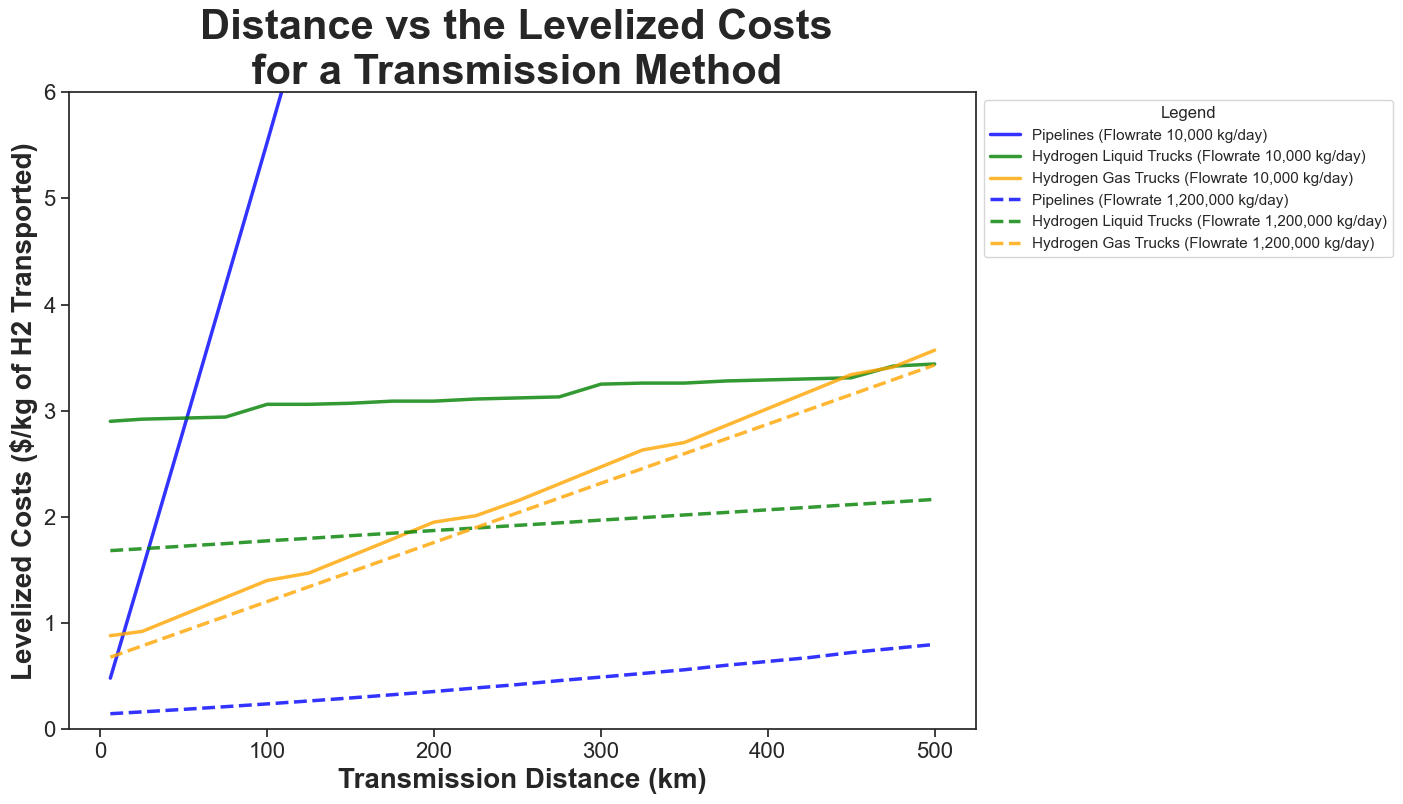

In [84]:
# Distance in km
x = [6,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]
import seaborn as sns
import matplotlib.pyplot as plt

# Raw copied values (including "$" signs)
gas_raw_values = ["$0.88", "$0.92", "$1.08", "$1.24", "$1.40", "$1.47", "$1.63", "$1.79", "$1.95", "$2.01", 
                  "$2.15", "$2.31", "$2.47", "$2.63", "$2.70", "$2.86", "$3.02", "$3.18", "$3.34", "$3.41", "$3.57"]

liquid_raw_values = ["$2.90", "$2.92", "$2.93", "$2.94", "$3.06", "$3.06", "$3.07", "$3.09", "$3.09", "$3.11", 
                     "$3.12", "$3.13", "$3.25", "$3.26", "$3.26", "$3.28", "$3.29", "$3.30", "$3.31", "$3.42", "$3.44"]

pipe_raw_values = [ "$0.48", "$1.49" ,"$2.83", 	"$4.18", "$5.53","$6.90","$8.26","$9.63","$10.99","$12.36","$13.73","$15.10",
                   "$16.56", "$17.94","$19.32", "$20.70", "$22.09","$23.48","$24.86","$26.25","27.64647167"]
# Remove "$" sign and convert to float
gas_row_values = [float(value.replace("$", "").strip()) for value in gas_raw_values]
liquid_row_values = [float(value.replace("$", "").strip()) for value in liquid_raw_values]
pipe_row_values = [float(value.replace("$", "").strip()) for value in pipe_raw_values]

# Define the new row as a DataFrame (flow rate index, adjust accordingly)
gas_new_row = pd.DataFrame([gas_row_values], columns=x, index=[10000])  # Adjust flow rate index as needed
liquid_new_row = pd.DataFrame([liquid_row_values], columns=x, index=[10000])
pipe_new_row = pd.DataFrame([pipe_row_values], columns=x, index=[10000])
# Append the row to your DataFrame
#df = pd.concat([df, new_row])

# Sort index to maintain order (optional)
#df = df.sort_index()

t_hydrogen_pipe_costs = pd.concat([tm_hydrogen_data['Cost-Only Pipe']['c_pipe_data'], pipe_new_row]).sort_index() #costs for pipe data
t_hydrogen_liquid_costs = pd.concat([tm_hydrogen_data['Cost-Only Liquid']['c_liquid_data'], liquid_new_row]).sort_index() #costs for liquid
t_hydrogen_gas_costs = pd.concat([tm_hydrogen_data['Cost-Only Gas']['c_gas_data'], gas_new_row]).sort_index() #costs for gas

sns.lineplot(x = x, y = 10000, data = t_hydrogen_pipe_costs.transpose(), 
             label ='Pipelines (Flowrate 10,000 kg/day)' ,color='blue',
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 10000, data = t_hydrogen_liquid_costs.transpose(), 
             label ='Hydrogen Liquid Trucks (Flowrate 10,000 kg/day)' ,color='green',     
            linewidth=2.5, alpha=0.8)
sns.lineplot(x = x, y = 10000, data = t_hydrogen_gas_costs.transpose(), 
             label ='Hydrogen Gas Trucks (Flowrate 10,000 kg/day)' ,color='orange',     
            linewidth=2.5, alpha=0.8)

sns.lineplot(x = x, y = 1200000, data = t_hydrogen_pipe_costs.transpose(), 
             label ='Pipelines (Flowrate 1,200,000 kg/day)' ,color='blue',
            linewidth=2.5, alpha=0.8, linestyle='--')
sns.lineplot(x = x, y = 1200000, data = t_hydrogen_liquid_costs.transpose(), 
             label ='Hydrogen Liquid Trucks (Flowrate 1,200,000 kg/day)' ,color='green',     
            linewidth=2.5, alpha=0.8,linestyle='--')
sns.lineplot(x = x, y = 1200000, data = t_hydrogen_gas_costs.transpose(), 
             label ='Hydrogen Gas Trucks (Flowrate 1,200,000 kg/day)' ,color='orange',     
            linewidth=2.5, alpha=0.8, linestyle='--')


# Adding titles and labels
plt.title('Distance vs the Levelized Costs \n for a Transmission Method  ', fontsize = 30, fontweight = 'bold')
plt.xlabel('Transmission Distance (km)',fontsize = 20, fontweight = 'bold')
plt.ylim(0,6)
plt.yticks(fontsize = 16)
plt.ylabel('Levelized Costs ($/kg of H2 Transported)',fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 16)

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

In [85]:
t_hydrogen_pipe_costs

,6.0,25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,...,275.0,300.0,325.0,350.0,375.0,400.0,425.0,450.0,475.0,500.0
2000.0,0.475300,1.4896,2.831300,4.1763,5.525700,6.904800,8.263900,9.62570,10.990300,12.35760,...,15.09990,16.55800,17.937800,19.319400,20.702900,22.088100,23.475100,24.86390,26.254300,27.646472
10000.0,0.480000,1.4900,2.830000,4.1800,5.530000,6.900000,8.260000,9.63000,10.990000,12.36000,...,15.10000,16.56000,17.940000,19.320000,20.700000,22.090000,23.480000,24.86000,26.250000,27.646472
60000.0,0.205200,0.3870,0.628900,0.8738,1.121300,1.371400,1.641400,1.89680,2.153900,2.41270,...,2.93500,3.19850,3.522300,3.790400,4.059700,4.330000,4.601500,4.87400,5.147600,5.422289
120000.0,0.175900,0.2725,0.402100,0.5343,0.672400,0.809100,0.947600,1.08790,1.246400,1.39040,...,1.68230,1.83010,1.979100,2.129400,2.321800,2.475100,2.629400,2.78460,2.940700,3.097697
180000.0,0.165600,0.2336,0.325300,0.4194,0.517300,0.615200,0.714800,0.82580,0.928700,1.03300,...,1.24520,1.35310,1.486100,1.596700,1.708200,1.820600,1.933900,2.04820,2.163400,2.279416
240000.0,0.160200,0.2137,0.286200,0.3607,0.437300,0.517300,0.597000,0.67830,0.769200,0.85320,...,1.02470,1.13060,1.219400,1.309200,1.399900,1.491400,1.583900,1.67720,1.806000,1.901418
300000.0,0.156900,0.2016,0.262400,0.3251,0.389600,0.458200,0.525800,0.59480,0.673200,0.74490,...,0.89140,0.96620,1.059000,1.136100,1.214000,1.292700,1.372300,1.45270,1.533900,1.646159
360000.0,0.154500,0.1933,0.246300,0.3013,0.357700,0.415600,0.478300,0.53900,0.600900,0.67270,...,0.80230,0.86860,0.935800,1.020700,1.089900,1.159900,1.230800,1.30230,1.374700,1.447771
420000.0,0.152700,0.1873,0.234400,0.2834,0.334100,0.387000,0.440300,0.49940,0.555300,0.61220,...,0.73900,0.79900,0.860000,0.921800,0.984500,1.065400,1.129800,1.19500,1.260900,1.327465
480000.0,0.151400,0.1828,0.225700,0.2702,0.316300,0.363900,0.414600,0.46470,0.515800,0.57380,...,0.68130,0.74740,0.803700,0.860700,0.918500,0.977100,1.036500,1.11510,1.176000,1.237677


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

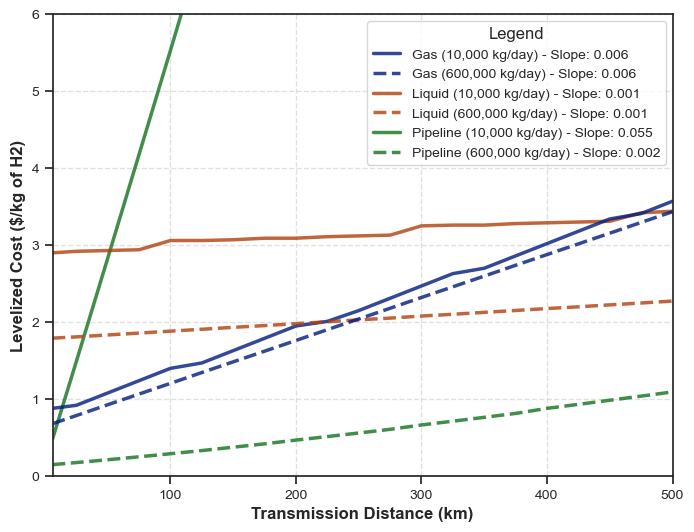

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Define Distance in km
x = np.array([6, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500])

# Use the same color palette from the market penetration plot
palette = sns.color_palette("dark", n_colors=3)

color_map = {
    "Gas Trucks": palette[0],    # Dark blue
    "Liquid Trucks": palette[1],  # Saturated orange
    "Pipelines": palette[2]       # Bold green
}

# Function to compute slopes
def compute_slope(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    return slope

# Extract cost data
pipe_10k = t_hydrogen_pipe_costs.loc[10000]
liquid_10k = t_hydrogen_liquid_costs.loc[10000]
gas_10k = t_hydrogen_gas_costs.loc[10000]

pipe_1M = t_hydrogen_pipe_costs.loc[600000]
liquid_1M = t_hydrogen_liquid_costs.loc[600000]
gas_1M = t_hydrogen_gas_costs.loc[600000]

# Calculate slopes
slope_pipe_10k = compute_slope(x, pipe_10k)
slope_liquid_10k = compute_slope(x, liquid_10k)
slope_gas_10k = compute_slope(x, gas_10k)

slope_pipe_1M = compute_slope(x, pipe_1M)
slope_liquid_1M = compute_slope(x, liquid_1M)
slope_gas_1M = compute_slope(x, gas_1M)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot flowrate 10,000 kg/day (Solid lines)
sns.lineplot(x=x, y=pipe_10k, label=f'Pipeline (10,000 kg/day) - Slope: {slope_pipe_10k:.3f}', color=color_map["Pipelines"], linewidth=2.5, alpha=0.8)
sns.lineplot(x=x, y=liquid_10k, label=f'Liquid (10,000 kg/day) - Slope: {slope_liquid_10k:.3f}', color=color_map["Liquid Trucks"], linewidth=2.5, alpha=0.8)
sns.lineplot(x=x, y=gas_10k, label=f'Gas (10,000 kg/day) - Slope: {slope_gas_10k:.3f}', color=color_map["Gas Trucks"], linewidth=2.5, alpha=0.8)

# Plot flowrate 1,200,000 kg/day (Dashed lines)
sns.lineplot(x=x, y=pipe_1M, label=f'Pipeline (600,000 kg/day) - Slope: {slope_pipe_1M:.3f}', color=color_map["Pipelines"], linewidth=2.5, alpha=0.8, linestyle='--')
sns.lineplot(x=x, y=liquid_1M, label=f'Liquid (600,000 kg/day) - Slope: {slope_liquid_1M:.3f}', color=color_map["Liquid Trucks"], linewidth=2.5, alpha=0.8, linestyle='--')
sns.lineplot(x=x, y=gas_1M, label=f'Gas (600,000 kg/day) - Slope: {slope_gas_1M:.3f}', color=color_map["Gas Trucks"], linewidth=2.5, alpha=0.8, linestyle='--')

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.6)

# Add titles and labels
#plt.title('Distance vs Levelized Costs for Transmission Methods', fontsize=20, fontweight='bold')
plt.xlabel('Transmission Distance (km)', fontsize=12, fontweight='bold')
plt.ylabel('Levelized Cost ($/kg of H2)', fontsize=12, fontweight='bold')
plt.ylim(0, 6)
plt.xlim(6, 500)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define the new order (example: reorder Gas, Liquid, Pipeline)
new_order = [
    "Gas (10,000 kg/day) - Slope: {:.3f}".format(slope_gas_10k),
    "Gas (600,000 kg/day) - Slope: {:.3f}".format(slope_gas_1M),
    "Liquid (10,000 kg/day) - Slope: {:.3f}".format(slope_liquid_10k),
    "Liquid (600,000 kg/day) - Slope: {:.3f}".format(slope_liquid_1M),
    "Pipeline (10,000 kg/day) - Slope: {:.3f}".format(slope_pipe_10k),
    "Pipeline (600,000 kg/day) - Slope: {:.3f}".format(slope_pipe_1M)
]

# Reorder the handles based on the new order
ordered_handles = [handles[labels.index(label)] for label in new_order]

plt.legend(frameon=True)
# Set the new legend order
plt.legend(ordered_handles, new_order, title="Legend", loc='upper right', fontsize=10, title_fontsize=12, frameon=True)
plt.savefig("Final Plots/ Transmission_Costs_Distance.png")

# Show plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

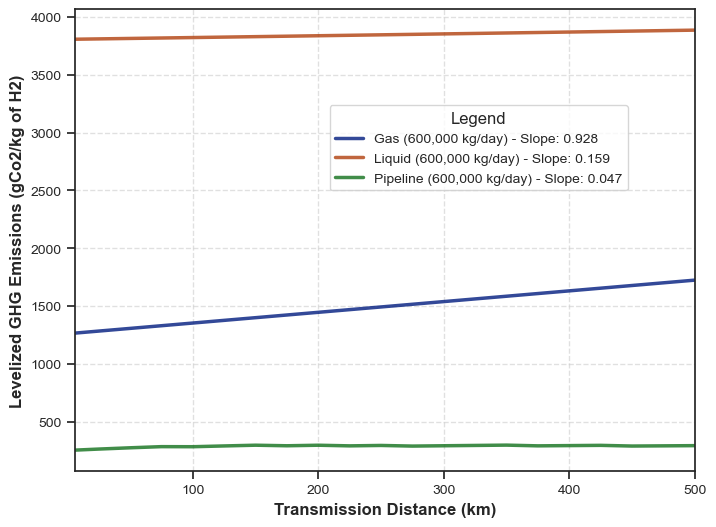

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Define Distance in km
x = np.array([6, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500])

# Use the same color palette from the market penetration plot
palette = sns.color_palette("dark", n_colors=3)

color_map = {
    "Gas Trucks": palette[0],    # Dark blue
    "Liquid Trucks": palette[1],  # Saturated orange
    "Pipelines": palette[2]       # Bold green
}

# Function to compute slopes
def compute_slope(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    return slope

# Extract cost data
pipe_10k = tm_hydrogen_data['GHG Emissions Pipe']['g_pipe_data'].loc[1200000]
liquid_10k = tm_hydrogen_data['GHG Emissions Liquid']['g_liquid_data'].loc[1200000]
gas_10k = tm_hydrogen_data['GHG Emissions Gas']['g_gas_data'].loc[1200000]

# Calculate slopes
slope_pipe_10k = compute_slope(x, pipe_10k)
slope_liquid_10k = compute_slope(x, liquid_10k)
slope_gas_10k = compute_slope(x, gas_10k)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot flowrate 10,000 kg/day (Solid lines)
sns.lineplot(x=x, y=pipe_10k, label=f'Pipeline (600,000 kg/day) - Slope: {slope_pipe_10k:.3f}', color=color_map["Pipelines"], linewidth=2.5, alpha=0.8)
sns.lineplot(x=x, y=liquid_10k, label=f'Liquid (600,000 kg/day) - Slope: {slope_liquid_10k:.3f}', color=color_map["Liquid Trucks"], linewidth=2.5, alpha=0.8)
sns.lineplot(x=x, y=gas_10k, label=f'Gas (600,000 kg/day) - Slope: {slope_gas_10k:.3f}', color=color_map["Gas Trucks"], linewidth=2.5, alpha=0.8)


# Add grid lines
plt.grid(True, linestyle="--", alpha=0.6)

# Add titles and labels
#plt.title('Distance vs Levelized Costs for Transmission Methods', fontsize=20, fontweight='bold')
plt.xlabel('Transmission Distance (km)', fontsize=12, fontweight='bold')
plt.ylabel('Levelized GHG Emissions (gCo2/kg of H2)', fontsize=12, fontweight='bold')
plt.xlim(6, 500)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define the new order (example: reorder Gas, Liquid, Pipeline)
new_order = [
    "Gas (600,000 kg/day) - Slope: {:.3f}".format(slope_gas_10k),
    #"Gas (1,200,000 kg/day) - Slope: {:.3f}".format(slope_gas_1M),
    "Liquid (600,000 kg/day) - Slope: {:.3f}".format(slope_liquid_10k),
    #"Liquid (1,200,000 kg/day) - Slope: {:.3f}".format(slope_liquid_1M),
    "Pipeline (600,000 kg/day) - Slope: {:.3f}".format(slope_pipe_10k),
    #"Pipeline (1,200,000 kg/day) - Slope: {:.3f}".format(slope_pipe_1M)
]

# Reorder the handles based on the new order
ordered_handles = [handles[labels.index(label)] for label in new_order]

# Set the new legend order
plt.legend(frameon=True)
plt.legend(ordered_handles, new_order, title="Legend", 
           loc="center left", bbox_to_anchor=(0.4, 0.7), 
           fontsize=10, title_fontsize=12, frameon=True)
plt.savefig("Final Plots/ Transmission_GHG_Distance.png")


# Show plot
plt.show()



In [88]:
tm_hydrogen_data['GHG Emissions Pipe']['g_pipe_data']

,6.0,25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,...,275.0,300.0,325.0,350.0,375.0,400.0,425.0,450.0,475.0,500.0
Cost,,,,,,,,,,,,,,,,,,,,,
2000.0,257.646074,280.109215,271.321637,280.736985,289.364468,272.079305,276.067142,279.905509,283.606037,287.179022,...,293.978017,274.925680,276.790389,278.621795,280.421159,282.189672,283.928458,285.638578,287.321038,288.976789
60000.0,257.018787,260.079826,269.757694,278.591334,286.725688,294.270630,274.204027,277.809331,281.292363,284.661768,...,291.089863,294.161787,274.882762,276.602700,278.294258,279.958429,281.596159,283.208339,284.795819,286.359404
120000.0,253.263347,264.695584,277.996280,289.769936,276.782716,282.618049,288.141881,293.388139,278.000884,281.072549,...,286.955026,289.776101,292.523160,295.200286,279.560747,281.287306,282.985480,284.656260,286.300587,287.919351
180000.0,253.242312,264.617422,277.859092,289.586197,279.118623,285.371880,291.270247,278.915866,282.514282,285.991777,...,292.617017,295.779187,281.892918,284.012524,286.089691,288.126219,290.123791,292.083988,294.008292,295.898097
240000.0,252.809905,263.000819,275.004264,285.744811,295.479164,284.044617,289.763772,295.186624,282.952862,286.468839,...,293.164148,281.444517,283.712032,285.931022,288.103685,290.232065,292.318073,294.363495,282.569524,284.050044
300000.0,252.302306,261.078498,271.564704,281.069425,289.772271,281.156067,286.476758,291.538791,281.451519,284.835076,...,291.289011,294.372776,283.319776,285.517481,287.669704,289.778436,291.845538,293.872749,295.861702,284.643994
360000.0,253.434853,265.331224,279.109104,276.574079,284.233924,291.366979,282.676634,287.306734,291.739983,282.287297,...,288.356699,291.263895,294.092730,283.899790,285.971292,288.002366,289.994684,291.949813,293.869226,295.754306
420000.0,252.619825,262.284127,273.727733,284.015812,293.374766,285.559900,291.483461,283.110538,287.134926,291.009735,...,285.061721,287.764652,290.399349,292.969436,295.478253,285.595991,287.485013,289.340438,291.163536,292.955501
480000.0,253.496833,265.560224,269.426020,278.134788,286.162690,293.615488,285.739161,290.718621,295.472299,286.349417,...,293.027218,284.248258,286.681376,289.058969,291.383713,293.658087,295.884399,286.463096,288.177296,289.863815
